> 회귀는 훈련 데이터의 오차를 최소화하는 모델을 찾는 방법. 즉, 데이터에 맞는 모델을 찾는 문제임.
모델이 직선, 평면 등과 같이 선형이면 선형회귀

> Training 데이터는 (X,t)이며, X는 입력값, t는 목표값

> 모델 파라미터는 (W,b)이며 가중치 W와 bias인 b

$y = WX + b$

## Step 05. 평균 제곱 오차 손실함수

In [1]:
import numpy as np

In [2]:
def MSE(y, t):
    return np.sum((y-t)**2)/t.size

In [3]:
t = np.array([1, 2, 3, 4])
y1 = np.array([0.5, 1, 1.5, 2])

In [4]:
print(MSE(y1, t))

1.875


In [5]:
y2 = np.array([0.5, 1.5, 2.5, 3.5])
print(MSE(y2, t))

0.25


In [2]:
import tensorflow as tf

In [17]:
def MSE(y, t):
    return tf.reduce_mean(tf.square(y,t))

In [21]:
t = np.array([1, 2, 3, 4])
y1 = np.array([0.5, 1, 1.5, 2])

    # tensor로 convert 안해도 돌아감
# t = tf.convert_to_tensor(t)
# y1 = tf.convert_to_tensor(y1)
MSE(y1, t)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [22]:
# tf.keras.losses.MeanSquaredError()

MSE = tf.keras.losses.MeanSquaredError()
MSE(y1, t)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

## Step 06. 넘파이 단순 선형 회귀
* 경사하강법 구현

### 1. 경사하강법
* $p_{t+1} = p_t -lr \Delta E(w,b)$

In [3]:
def MSE(y, t):
    return np.sum((t-y)**2)/t.size

In [4]:
x = np.arange(12)
t = np.arange(12)
print(x) ; print(t)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [5]:
w = 0.5
b = 0
lr = 0.001

loss_list = []

for i in range(200):
    y = w*x + b
    dW = np.sum((y- t)*x) / (2*t.size)
    dB = np.sum((y-t)) / (2*t.size)
    
    w = w - lr*dW
    b = b - lr*dB
    
    y = w*x + b
    loss = MSE(y, t)
    loss_list.append(loss)
    

In [7]:
print(b) ; print(w) ; print(loss)

0.061923658759418715
0.9853219999548573
0.0029210114519716197


In [8]:
print("w={:>.4f}. b={:.4f}, loss={:>.4f}".format(w, b, loss))

w=0.9853. b=0.0619, loss=0.0029


In [11]:
w = 2
b = 1
lr = 0.01

loss_list2 = []

for i in range(200):
    y = w*x + b
    
    dW = np.sum((y-t)*x) / (2*t.size)
    dB = np.sum((y-t)) / (2*t.size)
    
    w -= lr*dW
    b -= lr*dB
    y = w*x + b
    
    loss2 = MSE(y,t)
    loss_list2.append(loss2)

In [13]:
print("w={:>.4f}, b={:>.4f}, loss={:>.4f}".format(w,b,loss2))

w=0.9151, b=0.6467, loss=0.1182


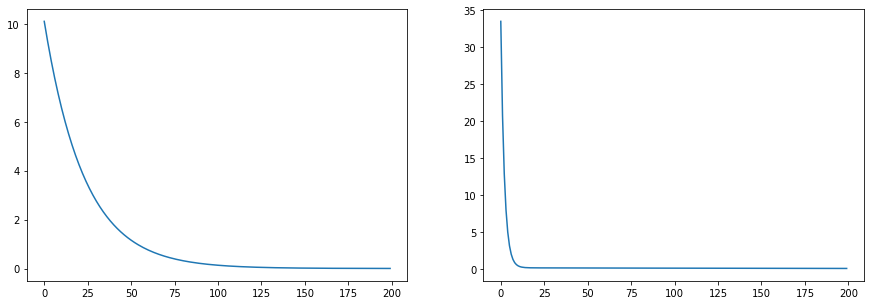

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(loss_list)
plt.subplot(122)
plt.plot(loss_list2)


### 2. 확률적 경사하강법
각 에폭에서 훈련 데이터를 모두 사용하지 않고, 일부만 사용해서 가중치를 업데이트 하는 방식.

일정 개수 이상의 배치크기로 샘플링하는 미니배치 학습으로 구현

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def MSE(y,t):
    return np.sum((y-t)**2) / (t.size)

In [28]:
x = np.arange(12)
t = np.arange(12)

w = 0.5
b = 0
lr = 0.001
loss_list = []

train_size = t.size
batch_size = 4
K = train_size // batch_size

for i in range(100):
    loss = 0
    for step in range(K):
        mask = np.random.choice(train_size, batch_size)
        x_batch = x[mask]
        t_batch = t[mask]
        
        y = w*x_batch + b
        dW = np.sum((y-t_batch)*x_batch) / (2*t_batch.size)
        dB = np.sum((y-t_batch)) / (2*t_batch.size)
        
        w -= lr*dW
        b -= lr*dB
        y = w*x_batch + b
        
        loss = MSE(y,t_batch)
    loss /=K
    loss_list.append(loss)
    if not i %10:
        print("Epoch={}, w={:>.4f}, b={:>.4f}, loss={}".format(i, w, b, loss))

Epoch=0, w=0.5395, b=0.0047, loss=4.443813898792699
Epoch=10, w=0.7699, b=0.0338, loss=1.0588615530560634
Epoch=20, w=0.8794, b=0.0471, loss=0.04219599747920227
Epoch=30, w=0.9357, b=0.0541, loss=0.04511686869893269
Epoch=40, w=0.9617, b=0.0573, loss=0.005768133682369174
Epoch=50, w=0.9770, b=0.0590, loss=0.002222886817310385
Epoch=60, w=0.9833, b=0.0596, loss=0.0013038498783409834
Epoch=70, w=0.9873, b=0.0599, loss=0.00034081701576090125
Epoch=80, w=0.9897, b=0.0600, loss=0.0007028326054001532
Epoch=90, w=0.9904, b=0.0598, loss=0.00022395454574745033


In [26]:
np.random.choice(12,4)

array([8, 3, 2, 1])

### 3. 자동 미분 계산
텐서플로의 자동 미분 계산을 사용

* tf.GradientTape : 연산을 테이프에 기록
* tf.GradientTape.dradient() : 기록된 연산의 미분을 자동으로 계산

테이프에 기록하는 연산은 텐서 변수여야 하며, 상수는 테이프에서 추적할 수 있도록 **tf.GradientTape.watch()**로 설정

GradientTape.gradient()는 한번 호출하면 테이프에 기록된 자원이 해제되므로, 자원을 유지하여 한 번이상 호출하려면 **tf.GradientTape(presistent = True)**로 그래디언트 테이프를 생성

In [29]:
import tensorflow as tf

In [30]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

In [31]:
with tf.GradientTape() as tape:
    z = x**2 + y**2
dx, dy = tape.gradient(z, [x,y])

In [32]:
print('dx=', dx.numpy())
print("dy=", dy.numpy())

dx= 4.0
dy= 6.0


$z(x,y)=x^2 + y^2$

$dx = 2x$, $dy = 2y$  at  $x=2, y=3$

$dx = 2*2=4$  
$dy = 2*3=6$

In [38]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(x)
    tape.watch(y)
    z = x**2 + y**2

dx, dy = tape.gradient(z, [x,y])

In [39]:
print('dx=', dx.numpy())
print("dy=", dy.numpy())

dx= 4.0
dy= 6.0


In [40]:
x = tf.Variable(2.0)
y = tf.Variable(3.0)

with tf.GradientTape(watch_accessed_variables=False) as tape:
#     tape.watch(x)
#     tape.watch(y)
    z = x**2 + y**2

dx, dy = tape.gradient(z, [x,y])

In [41]:
print('dx=', dx.numpy())
print("dy=", dy.numpy())

AttributeError: 'NoneType' object has no attribute 'numpy'

tape.watch를 지정하지 않으면 dx, dy는 None로 저장되기 때문에 호출이 안됨

In [42]:
## 자동 미분 계산4 : 2차미분
x = tf.Variable(3.0)

with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape1:
        y = x**3
        dy = tape1.gradient(y,x)
    dy2 = tape2.gradient(dy,x)
print('dy=', dy.numpy())
print('dy2=', dy2.numpy())

dy= 27.0
dy2= 18.0


tf.GradientTape()로 그래디언트 테이프 tape2 내에서 tape1을 생성하고, 수식 $y=x^3$을 tape1에 기록

dy=tape1.graident(y, x)는 tape1으로 y에대한 x의 미분인 dy를 계산 $dy=3x^2$

## Step 08. 텐서플로 단순 선형 회귀

$y=wx + b$

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [46]:
x = np.arange(12)
t = np.arange(12)

w = tf.Variable(0.5)
b = tf.Variable(0.0)

lr = 0.001

loss_list = []

for epoch in range(100):
    with tf.GradientTape() as tape:
        y = x*w + b
        loss = tf.reduce_mean(tf.square(y-t))
    loss_list.append(loss.numpy())
    
    dW, dB = tape.gradient(loss, [w,b])
    w.assign_sub(lr*dW)
    b.assign_sub(lr*dB)

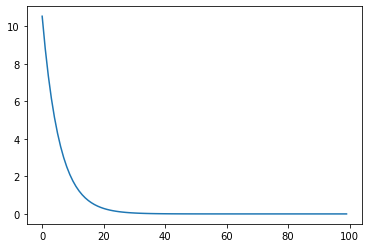

In [48]:
plt.plot(loss_list)

* w=0.5, b=0.0, lr=0.001로 100번 반복하여 학습시킴
* tf.GradientTape()로 tape를 생성하고, $y=x*w+b$와 loss = tf.reduce_mean(tf.square(y-t))을 tape에 기록하고, dW, dB를 자동으로 계산
* w.assign_sub(lr\*dW), b.assign_sub(lr\*dB)로 가중치 업데이트

In [49]:
# 미니배치에 의한 확률적 경사하강법
x = np.arange(12)
t = np.arange(12)

w = tf.Variable(0.5)
b = tf.Variable(0.0)
lr = 0.001

loss_list = []

train_size = x.size
batch_size = 4
K = train_size // batch_size


for epoch in range(100):
    batch_loss = 0.0
    for step in range(K):
        mask = np.random.choice(train_size, batch_size)
        x_batch = x[mask]
        t_batch = t[mask]
        
        with tf.GradientTape() as tape:
            y = x_batch * w + b
            loss = tf.reduce_mean(tf.square(y-t_batch))
            
        dW, dB = tape.gradient(loss, [w,b])
        w.assign_sub(lr*dW)
        b.assign_sub(lr*dB)
        
        batch_loss += loss.numpy()
    batch_loss /= K
    loss_list.append(batch_loss)

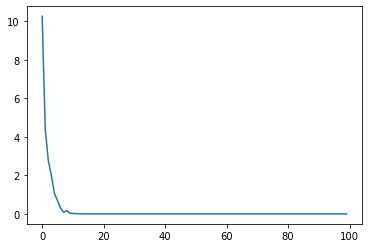

In [50]:
# lr = 0.001
plt.plot(loss_list)

In [51]:
# 미니배치에 의한 확률적 경사하강법
x = np.arange(12)
t = np.arange(12)

w = tf.Variable(0.5)
b = tf.Variable(0.0)
lr = 0.0001

loss_list = []

train_size = x.size
batch_size = 4
K = train_size // batch_size


for epoch in range(100):
    batch_loss = 0.0
    for step in range(K):
        mask = np.random.choice(train_size, batch_size)
        x_batch = x[mask]
        t_batch = t[mask]
        
        with tf.GradientTape() as tape:
            y = x_batch * w + b
            loss = tf.reduce_mean(tf.square(y-t_batch))
            
        dW, dB = tape.gradient(loss, [w,b])
        w.assign_sub(lr*dW)
        b.assign_sub(lr*dB)
        
        batch_loss += loss.numpy()
    batch_loss /= K
    loss_list.append(batch_loss)

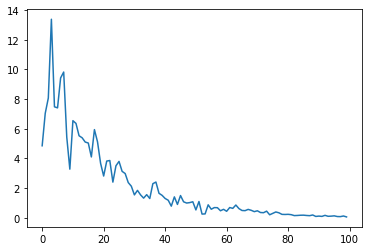

In [53]:
# lr = 0.0001
plt.plot(loss_list)

## 09. 다변수 선형 회귀
$y = b + w_1x_1 + w_2x_2 + \cdots + w_nx_n$

$y = WX + b$

$W = [w_1, \cdots, w_n]$, $X = [x_1, \cdots, x_n]$

In [54]:
import numpy as np
import tensorflow as tf

In [56]:
def MSE(y,t):
    return tf.reduce_mean(tf.square(y-t))

train_data = np.array([
    [1,0,4],
    [2,0,5],
    [3,0,6],
    [4,0,7],
    [1,1,6],
    [2,1,7],
    [3,1,8],
    [4,1,9]],dtype=np.float32)

In [59]:
X = train_data[:,:-1]
t = train_data[:,-1:]
print("X=",X)
print("t=",t)

X= [[1. 0.]
 [2. 0.]
 [3. 0.]
 [4. 0.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]
t= [[4.]
 [5.]
 [6.]
 [7.]
 [6.]
 [7.]
 [8.]
 [9.]]


In [64]:
tf.random.set_seed(1)
W = tf.Variable(tf.random.normal(shape=[2,1]),)
b = tf.Variable(tf.random.normal(shape=[1]))

In [68]:
y = tf.matmul(X,W) + b

In [69]:
loss=MSE(y,t)

In [70]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=77.48386>

In [71]:
# 2변수 선형회귀
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

MSE = tf.keras.losses.MeanSquaredError()

In [72]:
lr = 0.01
loss_list = []

for epoch in range(1000):
    with tf.GradientTape() as tape:
        y = tf.matmul(X, W)+b
        loss = MSE(y,t)
    loss_list.append(loss.numpy())
    
    dW, dB = tape.gradient(loss, [W,b])
    W.assign_sub(lr*dW)
    b.assign_sub(lr*dB)
    

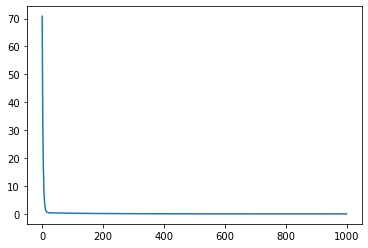

In [73]:
plt.plot(loss_list)

In [75]:
# 2변수 선형회귀의 미니배치 학습

train_size = X.shape[0]
batch_size = 4
K = train_size//batch_size

for epoch in range(1000):
    batch_loss = 0.0
    for step in range(K):
        with tf.GradientTape() as tape:
            y = tf.matmul(X, W)
        

8